In [92]:
import glob
import json
import numpy as np


In [331]:
import os
import pandas as pd

base_dir = os.path.join('data', 'llm-logs')
k_data = pd.read_csv(os.path.join(base_dir, f'all-rollouts-kltd.csv'))
d_data = pd.read_csv(os.path.join(base_dir, f'all-rollouts-topkd.csv'))

experiment_names = ['oracle', 'scientific', 'active', 'evolutionary', 'random']

In [490]:
from target_defs import archetype_predictions


In [332]:
from matplotlib import pyplot as plt 

colors = {'oracle': 'tab:blue', 'scientific': 'tab:orange', 'active': 'tab:green', 'evolutionary': 'tab:red', 'random': 'tab:purple'}
labels = {'oracle': 'LLM - Oracle', 'scientific': 'LLM - Scientific', 'active': 'Active Learning', 'evolutionary': 'Evolutionary', 'random': 'Random Selection'}
named_bools = {True: 'seeded', False: 'unseeded'}

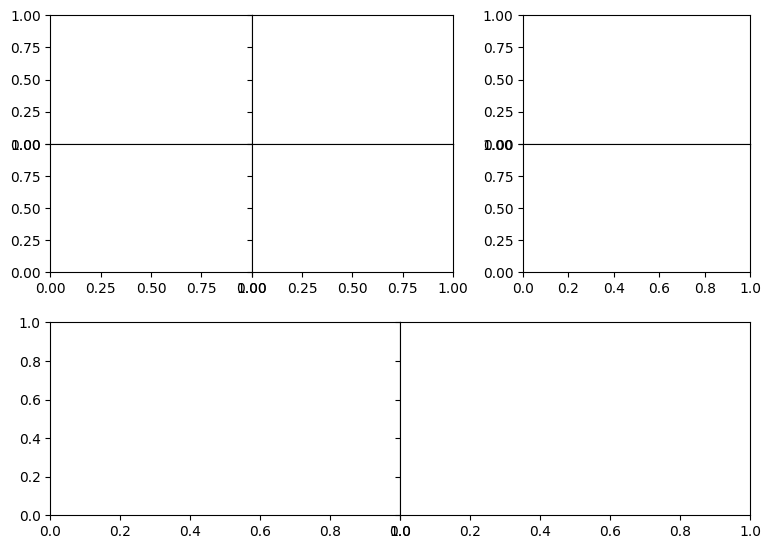

In [734]:
mosaic = """AB
            CD"""
# fig = plt.figure(layout="constrained")
fig = plt.figure(figsize=(7, 5))
top, bot = fig.subfigures(nrows=2, ncols=1, height_ratios=[2, 1.5])
axtl = top.subplot_mosaic(mosaic, sharex=True, sharey=True, 
                         gridspec_kw={"hspace": 0, "wspace": 0,
                                      "bottom": 0.1, "top": 1.0,
                                      "left": 0.0, "right": 0.575},
                         )

# identify_axes(axd)

# axd["C"].set_xlabel('Z0')
# axd["C"].set_ylabel('Z1')

mosaic = """E
            F"""
axtr = top.subplot_mosaic(mosaic, sharex=True, sharey=True,
                          gridspec_kw={"hspace": 0.0, "wspace": 0.0,
                                       "bottom": 0.1, "top": 1.0,
                                       "left": 0.675, "right": 1.0})

# identify_axes(axd)

bot_mos = "GH"
axb = bot.subplot_mosaic(bot_mos, sharex=True, sharey=True,
                         gridspec_kw={"hspace": 0.0, "wspace": 0.0,
                                      "bottom": 0.0, "top": 0.9,
                                      "left": 0.0, "right": 1.0})
# identify_axes(axd)

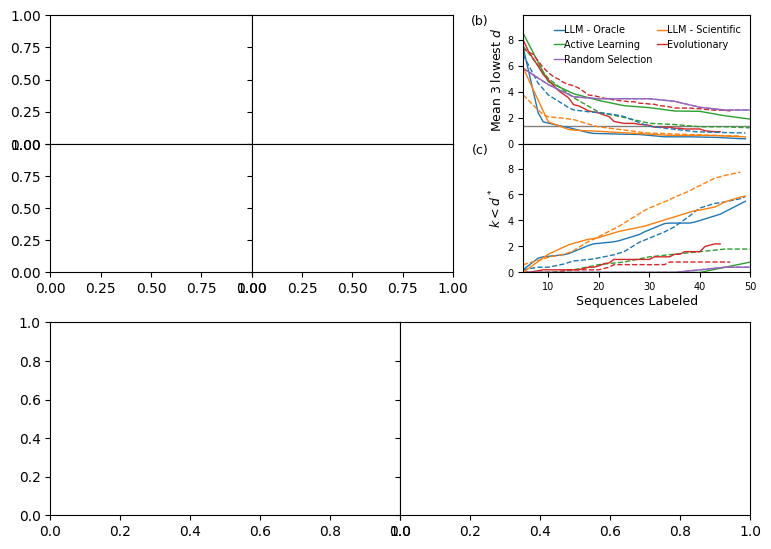

In [735]:
from matplotlib import gridspec

lp = 2  # axis label padding

ax = axtr["F"]

membrane_data = k_data.loc[k_data["Morphology"] == "membrane"]

for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "kltd after 1 Labels":].values - seed_offset 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls, label=lab)
# ax.plot(np.nan, np.nan, 'k-', lw=0.5, label='Seeded')
# ax.plot(np.nan, np.nan, 'k--', lw=0.5, label='Unseeded')
ax.set_ylabel('$k < d^*$', labelpad=lp, fontsize=9)
ax.set_xlabel('Sequences Labeled', labelpad=lp, fontsize=9)
ax.set_xlim(5)
ax.tick_params(axis='both', which='major', labelsize=7)

# ax = axes[1]
# ax = fig.add_subplot(gs1[1])
ax = axtr["E"]

membrane_data = d_data.loc[d_data["Morphology"] == "membrane"]

for (experiment, seed_type), run_data in membrane_data.groupby(["Experiment", "Seed Type"]):
    c = colors[experiment]
    if seed_type == "seeded":
        ls = '-'
        lab = labels[experiment]
    elif seed_type == "unseeded":
        ls = '--'
        lab = None
    else:
        raise ValueError()
    seed_offset = int((seed_type == "seeded") and experiment != 'random')
    v = run_data.loc[:, "topkd after 1 Labels":].values 
    ax.plot(np.arange(v.shape[1])+1, v.mean(axis=0), color=c, alpha=1.0, lw=1.0, ls=ls)

ax.plot([1, 50], [1.34, 1.34], 'k-', alpha=0.5, lw=1.0, zorder=0)#, label='Threshold')

# ax.plot(np.nan, np.nan, 'k-', lw=0.5, label='Seeded')
# ax.plot(np.nan, np.nan, 'k--', lw=0.5, label='Unseeded')

ax.set_ylabel('Mean 3 lowest $d$', labelpad=lp, fontsize=9)
ax.set_xlabel('Sequences Labeled', labelpad=lp, fontsize=9)
ax.set_ylim(0, 9.9)
ax.set_xlim(5, 50)
ax.tick_params(axis='both', which='major', labelsize=7)

axtr["E"].text(-0.15, 1.0, f'(b)', ha='right', va='top', fontsize=9, transform=axtr["E"].transAxes)
axtr["F"].text(-0.15, 1.0, f'(c)', ha='right', va='top', fontsize=9, transform=axtr["F"].transAxes)

for experiment in ['oracle', 'active', 'random', 'scientific', 'evolutionary']:
    c = colors[experiment]
    axtr["E"].plot(np.nan, np.nan, color=c, alpha=1.0, lw=1.0, ls='-', label=labels[experiment])

axtr["E"].legend(loc='upper right', ncol=2, columnspacing=0.5, borderpad=0.5, handletextpad=0, handlelength=1, fontsize=7, frameon=False)
# axtr["F"].legend(loc='upper right', ncol=2, columnspacing=0.5, borderpad=0.5, handletextpad=0, handlelength=1, fontsize=7)

# fig.tight_layout()
fig

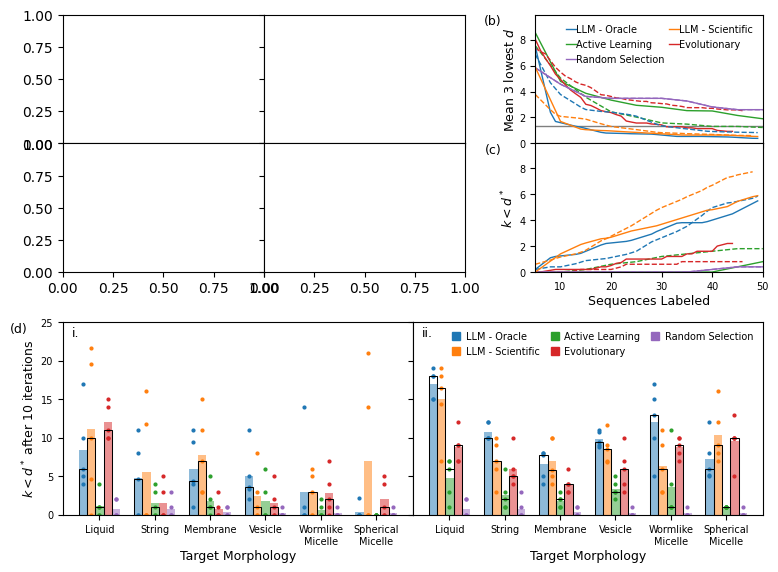

In [736]:
w = 0.15
offs = {'oracle': -2*w, 'scientific': -w, 'active': +0.0, 'evolutionary': w, 'random': 2*w}

# fig, axes = plt.subplots(1, 2, figsize=(7, 2), sharey='all')
# fig.subplots_adjust(hspace=0)

# gs2 = gridspec.GridSpec(1, 2)
# gs_inner = gs_outer[2].subgridspec(2, 1)
# axes = gs_inner.subplots()
axes = [axb["G"], axb["H"]]

# axes = [fig.add_subplot(gs[2, 0:2]), fig.add_subplot(gs[2, 2:4])]
# axes = [fig.add_subplot(gs2[i]) for i in range(2)]

for j, use_seed in enumerate([False, True]): 
    ax = axes[j]
    
    for ((experiment, seed_type), exp_data) in k_data.groupby(['Experiment', 'Seed Type']):
        if not (seed_type == named_bools[use_seed]):
            continue
        c = colors[experiment]
        v = []
        for i, morph in enumerate(arch_morphs):
            this_morph = exp_data['Morphology'] == morph
            values = np.nanmax(exp_data.loc[this_morph, 'kltd after 1 Labels':], axis=1)
            ax.plot(np.ones(len(values))*(i+1)+offs[experiment], values, color=c, marker='.', ls='none', zorder=1, ms=4)
            v.append(values)
        ax.bar(np.arange(len(v))+1+offs[experiment], np.mean(v, axis=1), width=w, zorder=0, alpha=0.5, lw=None, color=c)
        ax.bar(np.arange(len(v))+1+offs[experiment], np.median(v, axis=1), width=w, zorder=2, lw=0.75, edgecolor='k', fill=False)
    ax.set_xticks(np.arange(len(arch_morphs))+1, [it.title().replace(' ', '\n') for it in arch_morphs], fontsize=7)
    ax.tick_params(axis='both', which='major', labelsize=7)
    
    ax.set_ylim(0, 25)
    ss = ax.get_subplotspec()
    if ss.is_first_col():
        ax.set_ylabel('$k < d^*$ after 10 iterations', labelpad=lp, fontsize=9)
    if ss.is_last_row():
        ax.set_xlabel('Target Morphology', labelpad=lp, fontsize=9)
    
for k in offs.keys():
    axb["H"].plot(np.nan, np.nan, 's', color=colors[k], label=str(labels[k]))
# ax.legend(loc='upper right', ncol=5, bbox_to_anchor=(2.25, 1.25), alignment='center',
#           columnspacing=0.5, borderpad=0.5, handletextpad=0, handlelength=2, fontsize=8)
axb["H"].legend(loc='upper right', ncol=3, columnspacing=0.5, borderpad=0.5, handletextpad=0, handlelength=2, fontsize=7, frameon=False)

axb["G"].text(-0.10, 1.0, f'(d)', ha='right', va='top', fontsize=9, transform=axb["G"].transAxes)
# axb["H"].text(-0.10, 1.0, f'(e)', ha='right', va='top', fontsize=9, transform=axb["H"].transAxes)
axb["G"].text(0.025, 0.975, f'i.', ha='left', va='top', fontsize=9, transform=axb["G"].transAxes)
axb["H"].text(0.025, 0.975, f'ii.', ha='left', va='top', fontsize=9, transform=axb["H"].transAxes)

# fig.tight_layout()
fig

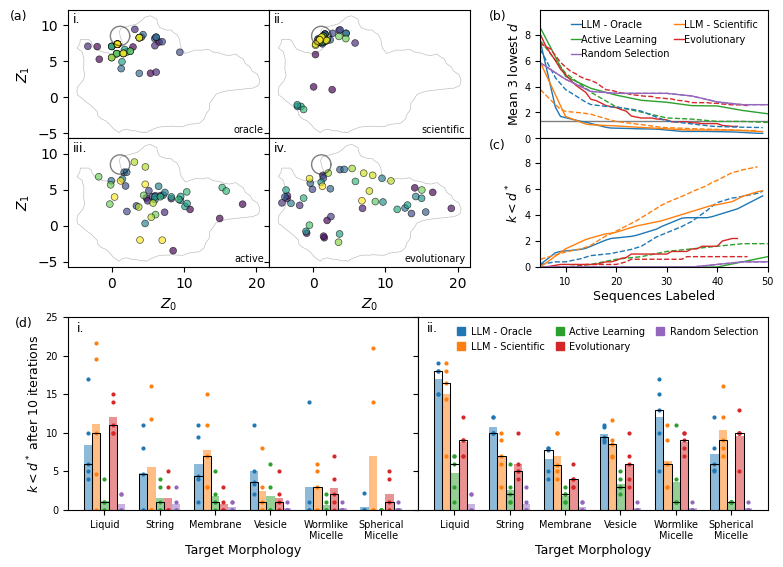

In [737]:
v = archetype_predictions["membrane"]
abc = "abcdefghijkl"

# fig, axes = plt.subplots(1, 4, sharey='all', sharex='all', figsize=(7, 2))
# fig.subplots_adjust(wspace=0)
# axes = [fig.add_subplot(gs[0, i]) for i in range(4)]
# gs3 = gridspec.GridSpec(1, 4, wspace=0) 

# gs_inner = gs_outer[0].subgridspec(2, 2)
# axes = gs_inner.subplots(sharex='all', sharey='all').flatten()
axes = [axtl[it.upper()] for it in abc[:4]]

# axes = []
# for i in range(4):
#     if i == 0:
#         ax = fig.add_subplot(gs3[i])
#     else:
#         ax = fig.add_subplot(gs3[i], sharey=axes[0])
#     axes.append(ax)

inum = ["i", "ii", "iii", "iv"]

for fid, experiment in enumerate([it for it in experiment_names if it != "random"]):
    ax = axes[fid]
    
    data = pd.read_csv(os.path.join('data', f'sample-rollout-membranes-{experiment}.csv'), index_col=0)
    if data.shape[0] > 50:
        data = data.iloc[:50, :]  # limit to 50 entries
    # display(data)
    
    # ax = fig.add_subplot(gs[1, :])

    im = ax.scatter(*data.loc[:, 'Z0':'Z1'].values.T, c=data.loc[:, 'Iteration']+1, s=24, ec='k', lw=0.5, zorder=1, alpha=0.67)#, vmin=1, vmax=10)
    
    ax.plot(*orig_hull.T, 'k-', lw=0.5, alpha=0.25, zorder=0)
    
    t = np.linspace(0, 2*np.pi)
    circ_points = np.vstack([np.cos(t), np.sin(t)]).T  # radius = 1
    # fig.gca().plot(*v, 'k.', alpha=0.5, zorder=2)
    ax.plot(*(1.34 * circ_points + v).T, 'k-', lw=1.0, alpha=0.5, zorder=2)
    ax.text(0.975, 0.025, experiment, ha='right', va='bottom', fontsize=7, transform=ax.transAxes)
    ax.text(0.025, 0.975, f'{inum[fid]}.', ha='left', va='top', fontsize=9, transform=ax.transAxes)
    
    # ax.set_xlabel('$Z_0$')
    ax.set_aspect('equal', adjustable='datalim')
    
    ss = ax.get_subplotspec()
    if ss.is_last_row():
        ax.set_xlabel('$Z_0$')
    if ss.is_first_col():
        ax.set_ylabel('$Z_1$')
axtl["A"].text(-0.20, 1.0, f'(a)', ha='right', va='top', fontsize=9, transform=axtl["A"].transAxes)
fig

In [738]:
fig.savefig(os.path.join('figures', 'fig2-data.pdf'), dpi=600, bbox_inches='tight')

In [219]:
import alphashape
import numpy as np
import pandas as pd


def make_alpha_hull(xy, alpha=1):
    alpha_shape = alphashape.alphashape(xy, alpha)
    xH, yH = alpha_shape.boundary.coords.xy
    return np.vstack([xH, yH]).T


all_data = []
for keyword in ['random', 'kmeans']:
    df = pd.read_csv(f'polymers-umap-{keyword}.txt', header=None, names=['Sequence', 'Z0', 'Z1'])
    all_data.append(df)

orig_data = pd.concat(all_data)
orig_hull = make_alpha_hull(orig_data.loc[:, 'Z0':'Z1'])

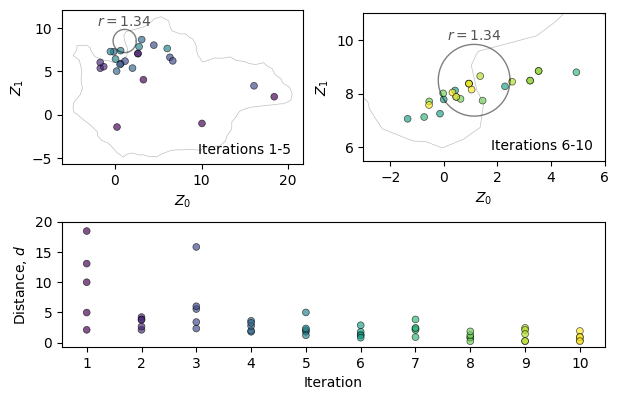

In [281]:
from matplotlib import gridspec

data = pd.read_csv(os.path.join('data', 'sample-rollout-membranes-scientific.csv'), index_col=0)

fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[1, 1])

ax = fig.add_subplot(gs[1, :])

v = archetype_predictions["membrane"]
data['d'] = np.linalg.norm(data.loc[:, 'Z0':'Z1'].values - v, axis=1)

# fig, ax = plt.subplots(figsize=(3.5, 2))
im = ax.scatter(data['Iteration']+1, data['d'], s=24, c=data['Iteration']+1, ec='k', lw=0.5,
                alpha=0.67, # rasterized=True,
                )
# cb = plt.colorbar(im, pad=0.05, fraction=0.05)
# cb.set_label('Iteration')
# cb.set_ticks(np.arange(1, 11, 5))
# cb.set_ticks([])
ax.set_xlabel('Iteration')
ax.set_ylabel('Distance, $d$')
ax.set_xticks(np.arange(1, 11))
ax.set_yticks(np.arange(0, 21, 5))

# fig, axes = plt.subplots(1, 2, figsize=(5, 2))#, sharex='all', sharey='all')
# fig.subplots_adjust(hspace=0)

axes = [fig.add_subplot(gs[0, i]) for i in range(2)]
labels = ['Iterations 1-5', 'Iterations 6-10']

for i, ax in enumerate(axes):
    
    f = (data.loc[:, 'Iteration'] >= i*5) & (data.loc[:, 'Iteration'] < (i+1)*5)
    im = ax.scatter(*data.loc[f, 'Z0':'Z1'].values.T, c=data.loc[f, 'Iteration']+1, s=24, ec='k', lw=0.5, zorder=1, alpha=0.67, vmin=1, vmax=10)
    
    ax.plot(*orig_hull.T, 'k-', lw=0.5, alpha=0.25, zorder=0)
    
    t = np.linspace(0, 2*np.pi)
    circ_points = np.vstack([np.cos(t), np.sin(t)]).T  # radius = 1
    v = archetype_predictions["membrane"]
    # fig.gca().plot(*v, 'k.', alpha=0.5, zorder=2)
    ax.plot(*(1.34 * circ_points + v).T, 'k-', lw=1.0, alpha=0.5, zorder=2)
    
    ax.set_xlabel('$Z_0$')
    ax.set_ylabel('$Z_1$')
    
    ax.set_aspect('equal')
    
    ax.text(v[0], v[1]+1.4, '$r = 1.34$', va='bottom', ha='center', alpha=0.67, fontsize=10)
    ax.text(0.95, 0.05, labels[i], transform=ax.transAxes, va='bottom', ha='right', fontsize=10)
    
axes[1].set_xlim(-3, 6)
axes[1].set_ylim(5.5, 11)

# cb = plt.colorbar(im)#, ticks=np.arange(0, 11, 2))
# cb.set_label('Iteration')

# ax.legend(loc='lower right', handletextpad=0.0, ncol=1)
fig.subplots_adjust(hspace=0.05, wspace=0.25)
# fig.tight_layout()

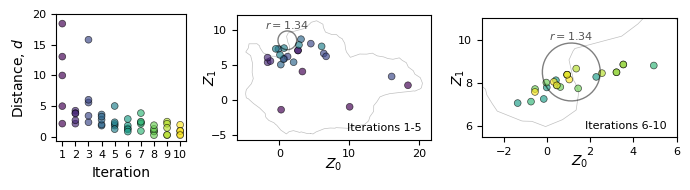

In [326]:
from matplotlib import gridspec

data = pd.read_csv(os.path.join('data', 'sample-rollout-membranes-scientific.csv'), index_col=0)

# fig, axes = plt.subplots(1, 3, figsize=(7, 1.8))
fig = plt.figure(figsize=(7, 2.0))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.5, 1.5])

ax = fig.add_subplot(gs[0, 0])

# ax = axes[2]

v = archetype_predictions["membrane"]
data['d'] = np.linalg.norm(data.loc[:, 'Z0':'Z1'].values - v, axis=1)

# fig, ax = plt.subplots(figsize=(3.5, 2))
im = ax.scatter(data['Iteration']+1, data['d'], s=24, c=data['Iteration']+1, ec='k', lw=0.5,
                alpha=0.67, # rasterized=True,
                )
# cb = plt.colorbar(im, pad=0.05, fraction=0.05)
# cb.set_label('Iteration')
# cb.set_ticks(np.arange(1, 11, 5))
# cb.set_ticks([])
ax.set_xlabel('Iteration', fontsize=10)
ax.set_ylabel('Distance, $d$', fontsize=10)
ax.set_xticks(np.arange(1, 11))
ax.set_yticks(np.arange(0, 21, 5))
ax.tick_params(axis='both', which='major', labelsize=8)

# fig, axes = plt.subplots(1, 2, figsize=(5, 2))#, sharex='all', sharey='all')
# fig.subplots_adjust(hspace=0)

axes = [fig.add_subplot(gs[0, i+1]) for i in range(2)]
labels = ['Iterations 1-5', 'Iterations 6-10']

for i, ax in enumerate(axes):
    
    f = (data.loc[:, 'Iteration'] >= i*5) & (data.loc[:, 'Iteration'] < (i+1)*5)
    im = ax.scatter(*data.loc[f, 'Z0':'Z1'].values.T, c=data.loc[f, 'Iteration']+1, s=24, ec='k', lw=0.5, zorder=1, alpha=0.67, vmin=1, vmax=10)
    
    ax.plot(*orig_hull.T, 'k-', lw=0.5, alpha=0.25, zorder=0)
    
    t = np.linspace(0, 2*np.pi)
    circ_points = np.vstack([np.cos(t), np.sin(t)]).T  # radius = 1
    v = archetype_predictions["membrane"]
    # fig.gca().plot(*v, 'k.', alpha=0.5, zorder=2)
    ax.plot(*(1.34 * circ_points + v).T, 'k-', lw=1.0, alpha=0.5, zorder=2)
    
    ax.set_xlabel('$Z_0$', labelpad=-2, fontsize=10)
    ax.set_ylabel('$Z_1$', labelpad=-6, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    ax.set_aspect('equal')
    
    
    ax.text(v[0], v[1]+1.4, '$r = 1.34$', va='bottom', ha='center', alpha=0.67, fontsize=8)
    ax.text(0.95, 0.05, labels[i], transform=ax.transAxes, va='bottom', ha='right', fontsize=8)
    
axes[1].set_xlim(-3, 6)
axes[1].set_ylim(5.5, 11)

# cb = plt.colorbar(im)#, ticks=np.arange(0, 11, 2))
# cb.set_label('Iteration')

# ax.legend(loc='lower right', handletextpad=0.0, ncol=1)
# fig.subplots_adjust(hspace=0.15, wspace=0.05)
fig.tight_layout()

In [327]:
fig.savefig(os.path.join('figures', 'sample-rollout-membrane.pdf'), dpi=600, bbox_inches='tight')